In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,average_precision_score,recall_score,confusion_matrix
%matplotlib inline

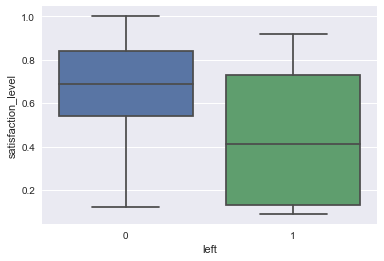

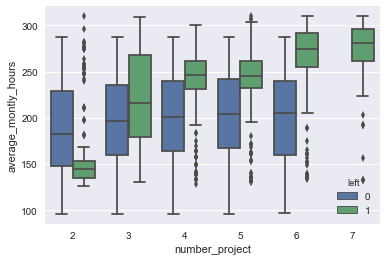

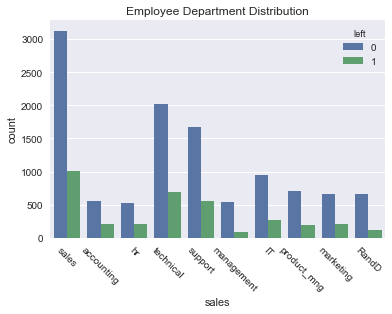

In [39]:
# Obtaining the Data
hr_data=pd.read_csv("HR_Analytics.csv")

df=pd.read_csv("HR_Analytics.csv")


#Visualization
sns.boxplot(y="satisfaction_level", x="left", data=hr_data)
sns.plt.show()

sns.boxplot(x="number_project", y="average_montly_hours",hue="left", data=hr_data)
sns.plt.show()

sns.countplot(x='sales', hue="left",data=hr_data).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

# Exploring the Data

In [40]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
hr_data.shape
 

(14999, 10)

# _Correlation between the predictors_

Text(0.5,1,'Correlation between different fearures of the Data')

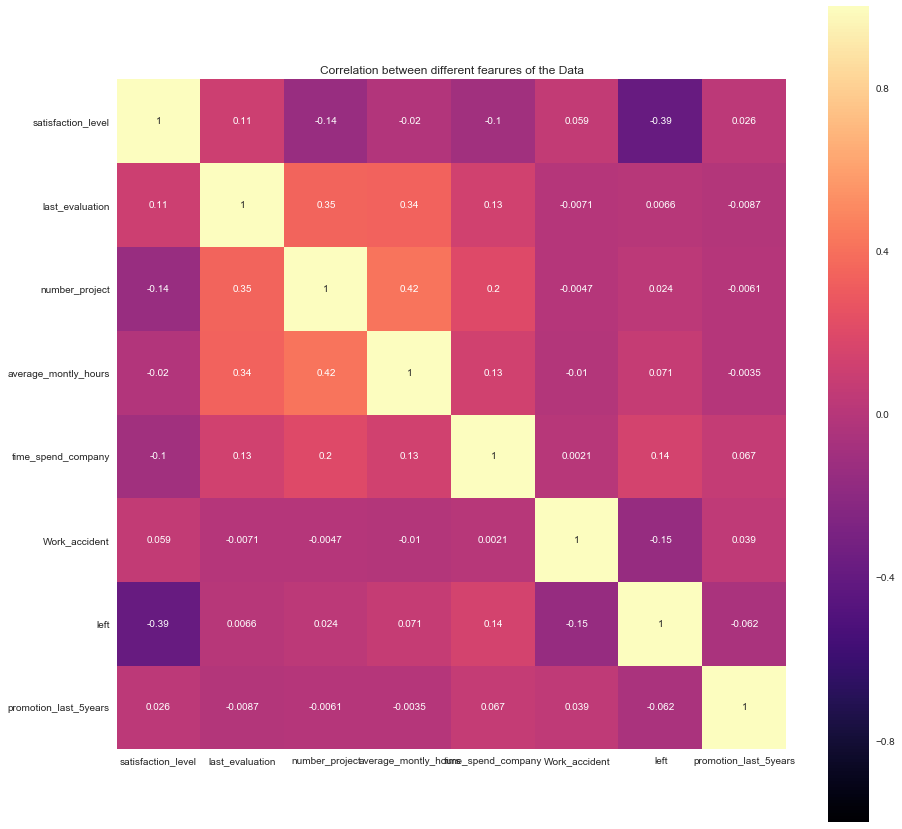

In [42]:
corr = hr_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='magma')

plt.title('Correlation between different fearures of the Data')

In [43]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [44]:
# Check if any null values
hr_data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [45]:
# Display the statistical overview of the employees
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [46]:
left_rate = hr_data.left.value_counts() / len(hr_data)
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

# Renaming the columns for better understanding

In [47]:
hr_data = hr_data.rename(columns={'sales' : 'department'
                        })
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Summary Statistics by different attributes

In [48]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = hr_data.groupby("left")
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Mapping the categorical variables to numeric 

In [49]:
# Mapping salary
salary_mapping={"low": 1, "medium": 2, "high": 3}
hr_data["salary"] = hr_data["salary"].map(salary_mapping)

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [50]:
# Mapping departments
dept_mapping={"accounting": 1, "hr": 2, "IT": 3, "management":4, "marketing":5,"product_mng":6,"RandD":7,"sales":8,"support":9, "technical":10}
hr_data["department"] = hr_data["department"].map(dept_mapping)
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,8,1
1,0.80,0.86,5,262,6,0,1,0,8,2
2,0.11,0.88,7,272,4,0,1,0,8,2
3,0.72,0.87,5,223,5,0,1,0,8,1
4,0.37,0.52,2,159,3,0,1,0,8,1


# Dividing into Training and Test Data Set : 75% train and 25% test 

In [51]:
from sklearn.model_selection import train_test_split

predictors = hr_data.drop(['left'], axis=1)
target = hr_data["left"]
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

# Random forests

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()
randomforest.fit(x_train_data, y_train_data)

y_pred = randomforest.predict(x_test_data)
acc_randomforest = round(accuracy_score(y_pred, y_test_data) * 100, 2)

print(acc_randomforest)
print("Accuracy Score:"+str(acc_randomforest))
print("Precision:"+str(average_precision_score(y_test_data,y_pred)))
print("Recall:"+str(recall_score(y_test_data,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_test_data)
print(cnf_matrix)

98.96
Accuracy Score:98.96
Precision:0.963474549426
Recall:0.964326812428
Confusion Matrix:
[[2873   31]
 [   8  838]]


In [72]:
#Number of Trees

In [71]:
len(randomforest.estimators_)

10

In [54]:
# Random Forest after Cross Validation

from sklearn.model_selection import train_test_split
predictors=hr_data.drop(["left"],axis=1)
target=hr_data["left"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = RandomForestClassifier()
scores = cross_val_score(clf, predictors, target, cv=5)
print(scores)
y_pred1=cross_val_predict(clf,predictors,target,cv=5)
print(y_pred1)
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred1)))
print("Recall:"+str(recall_score(target,y_pred1)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred1, target)
print(cnf_matrix)


[ 0.99633456  0.97833333  0.98366667  0.99833278  0.99333111]
[1 1 1 ..., 1 1 1]
Accuracy Score:0.989999688622
Precision:0.963996488857
Recall:0.968356202744
Confusion Matrix:
[[11385   113]
 [   43  3458]]


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_data, y_train_data)
y_pred = logreg.predict(x_test_data)
acc_logreg = round(accuracy_score(y_pred, y_test_data) * 100, 2)
print(acc_logreg)


print("Accuracy Score:"+str(acc_logreg))
print("Precision:"+str(average_precision_score(y_test_data,y_pred)))
print("Recall:"+str(recall_score(y_test_data,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_test_data)
print(cnf_matrix)

78.77
Accuracy Score:78.77
Precision:0.347363139694
Recall:0.341772151899
Confusion Matrix:
[[2657  572]
 [ 224  297]]


In [56]:
#Logistic Regression with cross Validation
from sklearn.model_selection import train_test_split
predictors=hr_data.drop(["left"],axis=1)
target=hr_data["left"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = LogisticRegression()
scores = cross_val_score(clf, predictors, target, cv=5)
print(scores)
y_pred1=cross_val_predict(clf,predictors,target,cv=5)
print(y_pred1)


print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred1)))
print("Recall:"+str(recall_score(target,y_pred1)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred1,target)
print(cnf_matrix)

[ 0.79873376  0.79166667  0.807       0.79659887  0.64988329]
[1 0 1 ..., 1 1 1]
Accuracy Score:0.76877651656
Precision:0.339843678237
Recall:0.359843181182
Confusion Matrix:
[[10246  2286]
 [ 1182  1285]]


In [57]:
#Draw a plot of people who left or no by average level of satisfaction

In [58]:
hr_mean=hr_data.groupby(['left']).mean()
hr_mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,6.921071,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.985158,1.414730


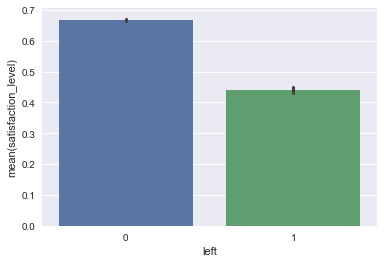

In [59]:
sns.barplot(x="left", y="satisfaction_level", data=hr_data)


#print("Left = 0", hr_data["satisfaction_level"][hr_data["left"] == 0].value_counts(normalize = True)[1]*100)

#print("Left = 1", hr_data["satisfaction_level"][hr_data["left"] == 1].value_counts(normalize = True)[1]*100)

# Box Plot

In [60]:
satisfaction_level_left = hr_data["satisfaction_level"][hr_data["left"] == 1]
satisfaction_level_not_left = hr_data["satisfaction_level"][hr_data["left"] == 0]

{'boxes': [<matplotlib.lines.Line2D at 0x233e0c04710>],
 'caps': [<matplotlib.lines.Line2D at 0x233e0c0b320>,
 'fliers': [<matplotlib.lines.Line2D at 0x233e0c14128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x233e0c0bc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x233e0c048d0>,
  <matplotlib.lines.Line2D at 0x233e0c04e48>]}

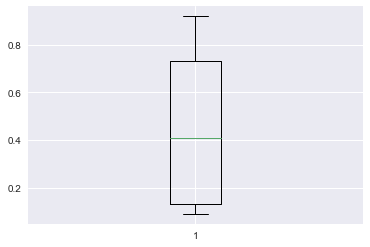

In [61]:
plt.boxplot(satisfaction_level_left,showfliers=True)

{'boxes': [<matplotlib.lines.Line2D at 0x233e0c5ba58>],
 'caps': [<matplotlib.lines.Line2D at 0x233e0c65668>,
 'fliers': [<matplotlib.lines.Line2D at 0x233e0c6b470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x233e0c65f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x233e0c5bc18>,
  <matplotlib.lines.Line2D at 0x233e0c651d0>]}

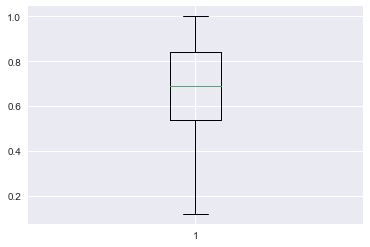

In [62]:
plt.boxplot(satisfaction_level_not_left,showfliers=True)

# Features Ranking

In [63]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'time_spend_in_Comapny',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [64]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(x_train_data,y_train_data)


df.head()



,satisfaction,evaluation,projectCount,average_monthly_hours,time_spend_in_Comapny,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [65]:
from sklearn.model_selection import train_test_split

predictors = df.drop(['turnover'], axis=1)
target = df["turnover"]
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

In [66]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(x_train_data,y_train_data)

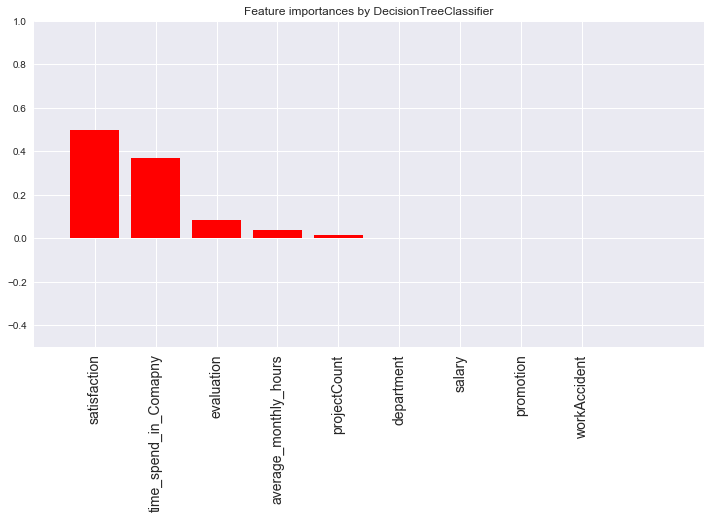

In [67]:
## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='red',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)+1])
plt.ylim([-0.5,1])
plt.show()

In [68]:
# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'time_spend_in_Comapny', 'int', 'turnover']
df = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train_data, X_test, y_train_data, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)


In [69]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','time_spend_in_Comapny', 'int']
logReg = sm.Logit(y_train_data, X_train_data[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction            -3.769022
evaluation               0.207596
time_spend_in_Comapny    0.170145
int                      0.181896
dtype: float64

# Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany*(0.170145) + 0.181896


In [70]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 28% chance of turnover
y1 = y(coef, 0.45, 0.51, 3)
p = np.exp(y1) / (1+np.exp(y1))
p

0.28949168285450533